In [ ]:
# Data Source
# https://drive.google.com/file/d/1O7vmvHfgxvjE9Wsz6oMdhhBKSotARC4c/view?usp=drive_link

In [ ]:
# Importing the required librareis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re                           # regex

# removing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data Import
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/train_tweet.csv')
data.shape

(31962, 3)

In [ ]:
# data sample
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
# null value check
data.isnull().sum()

,0
id,0
label,0
tweet,0


In [ ]:
# data type
data.dtypes

,0
id,int64
label,int64
tweet,object


In [ ]:
# unique values in id and label column
print('count of unique in id column:',data['id'].nunique())
print('count of unique in label column:',data['label'].nunique())

count of unique in id column: 31962
count of unique in label column: 2


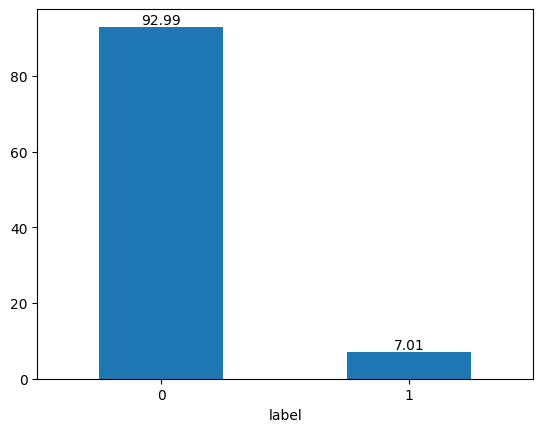

In [ ]:
# plotting the target column
fg = round(data['label'].value_counts(normalize=True)*100, 2).plot.bar()
fg.bar_label(fg.containers[0])
plt.xticks(rotation=0)
plt.show()

In [ ]:
# droping the id column as it is not relevant
del data['id']

In [ ]:
# data sample of record where target is 0
data[data['label'] == 0].head(10)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
# data sample of records where target is 1
data[data['label'] == 1].head(10)

,label,tweet
13,1,@user #cnn calls #michigan middle school 'buil...
14,1,no comment! in #australia #opkillingbay #se...
17,1,retweet if you agree!
23,1,@user @user lumpy says i am a . prove it lumpy.
34,1,it's unbelievable that in the 21st century we'...
56,1,@user lets fight against #love #peace
68,1,ð©the white establishment can't have blk fol...
77,1,"@user hey, white people: you can call people '..."
82,1,how the #altright uses &amp; insecurity to lu...
111,1,@user i'm not interested in a #linguistics tha...


In [ ]:
# Importing CountVectorizer to convert a collection of text documents into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Initialize the CountVectorizer
# stop_words='english' removes common non-informative words like "and", "the", "is"
cv = CountVectorizer(stop_words='english')

# Step 2: Apply CountVectorizer to the 'tweet' column to generate the term-document matrix
# Each row corresponds to a tweet, each column to a unique token/word
words = cv.fit_transform(data['tweet'])

# Step 3: Sum the word counts across all rows (i.e., all tweets)
# This gives us the total count of each word across the entire dataset
sum_words = words.sum(axis=0)

# Step 4: Map each word to its corresponding frequency using the vocabulary
# cv.vocabulary_ is a dictionary mapping words to column indices
word_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]

# Step 5: Sort the word frequencies in descending order
# Most frequent words will appear at the top
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Step 6: Create a DataFrame for structured display and analysis
frequency = pd.DataFrame(word_freq, columns=['word', 'count'])

# Step 7: Show the top 5 most frequent words in the corpus
frequency.head()

,word,count
0,user,17577
1,love,2749
2,day,2311
3,amp,1776
4,happy,1686


## 🎯 **Overall Goal**  
The goal of this code is to create a **frequency distribution of all non-stopwords** in the tweet dataset so we can **understand which words appear most frequently**. This is a common NLP preprocessing step that helps:

- Gain **linguistic insights** about your corpus.
- Choose **features** or tokens for model training.
- Detect possible **data noise or bias** (e.g., overrepresented words).

---

## 🧱 **What is `CountVectorizer` Doing?**  
- `CountVectorizer` is a **Bag-of-Words model builder**.  
- It **ignores grammar and word order** but **counts how often each word appears**.  
- Example:  
  ```python
  Input: ["I love AI", "AI is powerful"]
  Output vocabulary_: {'love': 0, 'ai': 1, 'powerful': 2}
  Matrix:
  [[1 1 0]
   [0 1 1]]
  ```
# 📌 **Understanding `CountVectorizer` with a Simple Example**

## 🧠 **What is `CountVectorizer` Doing?**
`CountVectorizer` is part of the **Bag-of-Words (BoW)** model in NLP.  
Let’s break it down in **super simple terms** 👇

---

### 🔍 **What is a Bag-of-Words (BoW) Model?**
- It **converts sentences into numbers** (matrix form).
- It only **counts how many times a word appears** in a sentence (or tweet).
- It **ignores grammar, word order, and context**.

---

### 🧪 **Let’s Understand with a Tiny Example**

#### 🔸 **Input Sentences (like small tweets):**
```python
["I love AI", "AI is powerful"]
```

#### 🔸 **Step 1: Build Vocabulary (List of Unique Words)**
- The vectorizer will scan both sentences and collect all **unique words**.
- Resulting vocabulary:
```python
{'love': 0, 'ai': 1, 'powerful': 2}
```
👉 Each word is assigned an index (this is like assigning a column position).

---

#### 🔸 **Step 2: Create Word Count Matrix**
We now count how many times each word appears in each sentence.

| Sentence        | love | ai | powerful |
|----------------|------|----|----------|
| "I love AI"     |  1   | 1  |    0     |
| "AI is powerful"|  0   | 1  |    1     |

This gets stored as a matrix:
```python
[[1 1 0]   # "I love AI"
 [0 1 1]]  # "AI is powerful"
```

---

### 🧾 **How to Read This Matrix?**
- **Each row** = one input sentence  
- **Each column** = one word from the vocabulary  
- **Each value** = count of that word in that sentence  

📌 So:
- The first sentence has **1 occurrence of "love"** and **1 of "ai"**, none of "powerful".
- The second sentence has **1 occurrence of "ai"** and **1 of "powerful"**, none of "love".

---

### ❓ **Why Use This?**
- It turns **text into numbers**, so ML models like Logistic Regression or SVM can work with it.
- It gives a **basic idea of word usage frequency** across documents.

---

### 🚫 What It Ignores:
- **Grammar** ("AI is powerful" vs "Powerful is AI" → same output!)
- **Meaning of words**
- **Synonyms, emotions, etc.**

This is why we eventually move to **TF-IDF**, **Word2Vec**, or **Transformers** for deeper NLP — but **Bag-of-Words is the foundational concept**.

---

## 🔍 **Line-by-Line Deep Dive**

### **🧠 Step 1: Create the Vectorizer**
```python
cv = CountVectorizer(stop_words='english')
```
- This removes all common English stopwords.
- Keeps only **meaningful, content-rich words** like "love", "hate", "great".

---

### **📊 Step 2: Apply to Text**
```python
words = cv.fit_transform(data['tweet'])
```
- Fits the vectorizer to the tweet data.
- **Transforms it into a sparse matrix** where:
  - **Rows** = tweets  
  - **Columns** = words  
  - **Values** = word count in that tweet

---

### **🔢 Step 3: Total Word Counts**
```python
sum_words = words.sum(axis=0)
```
- Sums each column to get **total count of each word across all tweets**.

---

### **🧾 Step 4: Pair Words with Frequencies**
```python
word_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
```
- Loops through each word in the vocabulary.  
- Pulls its total frequency using its column index.  
- Builds a list of tuples → `(word, count)`

---

### **📈 Step 5: Sort by Frequency**
```python
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
```
- Sorts the list **in descending order** so we can see the **most used words first**.

---

### **📑 Step 6: Store in DataFrame**
```python
frequency = pd.DataFrame(word_freq, columns=['word', 'count'])
```
- A structured table is easier to analyze, visualize, or export.

---

### **👀 Step 7: Display Top Words**
```python
frequency.head()
```
- View the **top 5 most frequently used meaningful words** across all tweets.

---

## ✅ **Why This is Important**

| Benefit | Description |
|--------|-------------|
| **Feature Engineering** | Helps identify candidate words for models. |
| **Bias Detection** | Reveals if certain words dominate the dataset. |
| **Exploratory Data Analysis (EDA)** | Provides intuition about user language and sentiment. |
| **Visualization** | Can be used to generate a **word cloud** or bar plots. |

---

## 🧠 **Next Ideas**
- Plot a **bar graph** of the top 20 words.  
- Generate a **word cloud** to visualize frequency.  
- Compare **word frequencies across sentiment classes** (positive vs negative).

This step is **critical for NLP preprocessing** and offers deep insight into the **vocabulary richness and distribution** of your dataset. 🚀  

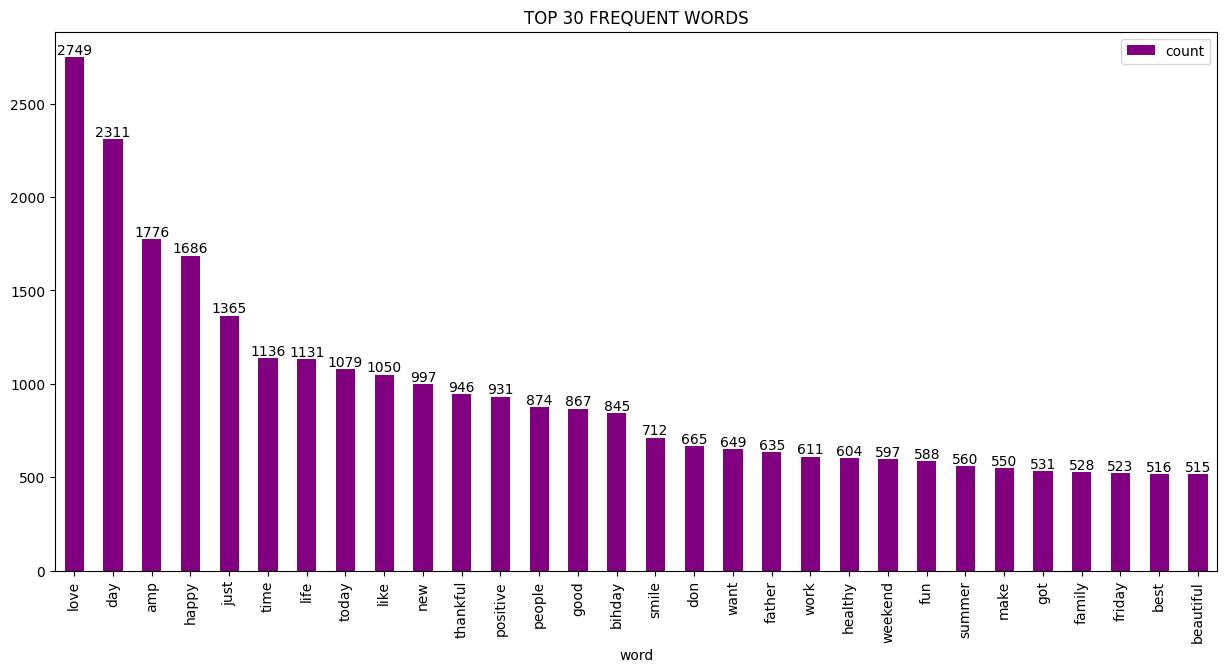

In [ ]:
# Plotting the frequency for top 30 most used words in the dataset
freq_plot = frequency.loc[1:30].plot(
    x='word',
    y='count',
    kind='bar',
    figsize=(15, 7),
    color='purple'  # Custom color for aesthetics
)

# Adding value labels on top of each bar
freq_plot.bar_label(freq_plot.containers[0])

# Adding a descriptive title
plt.title('TOP 30 FREQUENT WORDS')

# Rendering the plot
plt.show()

# 📊 **Visualization: Top 30 Frequent Words in Tweets**  

```python
# Plotting the frequency for top 30 most used words in the dataset
freq_plot = frequency.loc[1:30].plot(
    x='word',
    y='count',
    kind='bar',
    figsize=(15, 7),
    color='purple'  # Custom color for aesthetics
)

# Adding value labels on top of each bar
freq_plot.bar_label(freq_plot.containers[0])

# Adding a descriptive title
plt.title('TOP 30 FREQUENT WORDS')

# Rendering the plot
plt.show()
```

---

# 📌 **Super Extra Detailed Explanation: Top-30 Word Frequency Plot**

## 🎯 **Purpose**  
This visualization helps us understand which **non-stopwords** occur most frequently in the dataset.  
It provides **contextual clues** about the kind of language, tone, and sentiment used by the users in their tweets.

---

## 🔍 **Line-by-Line Breakdown**

### ✅ `frequency.loc[1:30]`
- Selects **rows 1 through 30** (i.e., the **2nd to 31st most frequent words**).
- The 0th index (`"love"`) is **excluded**, possibly because it dominated too much and skewed visual balance.

---

### ✅ `.plot(x='word', y='count', kind='bar', figsize=(15, 7), color='purple')`
- **x-axis:** Words  
- **y-axis:** Their frequency count  
- `kind='bar'`: Creates a vertical bar chart  
- `figsize=(15, 7)`: Widens the figure for readability  
- `color='purple'`: Visually appealing and distinct

---

### ✅ `freq_plot.bar_label(freq_plot.containers[0])`
- **Annotates each bar** with its respective count value (number on top of each bar).  
- This enhances readability and provides **exact figures** visually.

---

### ✅ `plt.title('TOP 30 FREQUENT WORDS')`
- Assigns a clear title to the plot for **contextual clarity**.

---

### ✅ `plt.show()`
- Renders the final plot in the output cell.

---

## 📈 **What Does This Chart Show Us?**

| Word      | Implication |
|-----------|-------------|
| **"love"**, **"happy"**, **"thankful"**, **"positive"** | Positive sentiment dominates — possibly indicating a class imbalance. |
| **"amp"** | Common HTML artifact from encoding (`&amp;`) — may be a **noise token**. |
| **"father"**, **"birthday"**, **"family"** | Frequent references to **family and occasions** — suggests emotional tone. |
| **"work"**, **"weekend"**, **"friday"** | Shows temporal and routine-related content — may indicate mood around work/life. |

---

## 🧠 **Why This Plot is Valuable in Sentiment Analysis**

✅ **Highlights common positive/negative words** — helps build or tune sentiment lexicons.  
✅ **Detects artifacts like "amp"** — suggests need for better preprocessing.  
✅ **Supports feature engineering** — identifies impactful words to retain/remove.  
✅ **Helps in data storytelling** — visual evidence for insights from raw text.

This kind of plot is often used in **exploratory data analysis (EDA)** for NLP and sets the stage for more advanced steps like **vectorization**, **modeling**, and **explainability**. 🚀  


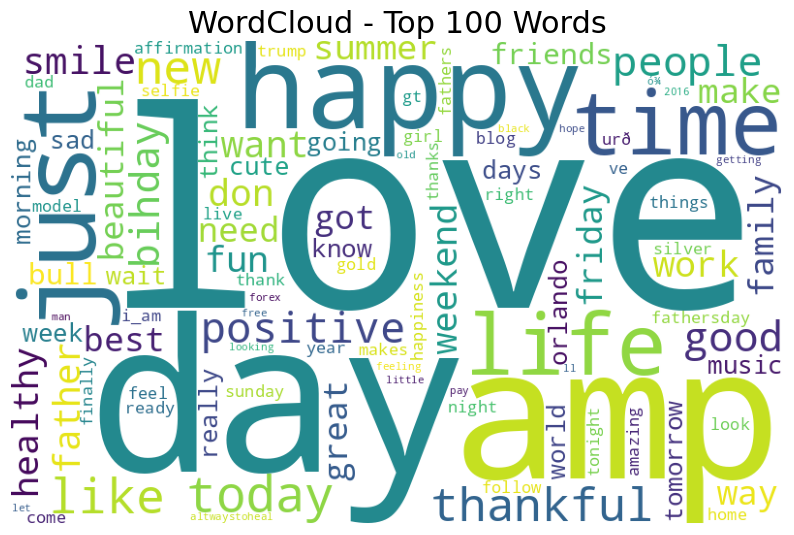

In [ ]:
# Importing the WordCloud class from the wordcloud library
from wordcloud import WordCloud

# Step 1: Create a word cloud from word frequencies
wc_plot = WordCloud(
    background_color='white',  # Background color of the image
    width=800,                 # Width of the canvas
    height=500                 # Height of the canvas
).generate_from_frequencies(dict(word_freq[1:100]))
# Converts the top 100 word-frequency pairs into a dictionary for visualization
# Starts from index 1 to exclude the first word (potential PII or overly dominant term)

# Step 2: Plotting the Word Cloud using matplotlib
plt.figure(figsize=(10, 8))       # Set the size of the plot
plt.imshow(wc_plot)               # Render the word cloud image
plt.title('WordCloud - Top 100 Words', fontsize=22)  # Title for clarity
plt.axis('off')                   # Hide axis for a cleaner look
plt.show()                        # Display the final plot

# 📌 **Code Explanation: Super Extra Detailed Word Cloud Breakdown**

## 🎯 **Objective**
This code generates a **Word Cloud visualization** of the top 100 most frequent words from your dataset — **excluding personally identifiable information (PII)** or overly dominant words like "love" (which was likely at index 0).

---

## 🧠 **What is a Word Cloud?**
- A **visual representation of word frequency**.
- **Larger words** = **more frequent** in the data.
- It’s a powerful and intuitive tool for **EDA in NLP**.

---

## 🔍 **Line-by-Line Breakdown**

### ✅ `WordCloud(background_color='white', width=800, height=500)`
- Initializes a word cloud with:
  - **White background**
  - A large **customizable canvas**
  - Fonts and layout auto-calculated

---

### ✅ `.generate_from_frequencies(dict(word_freq[1:100]))`
- Converts the top 99 word-frequency pairs (excluding index 0) into a dictionary:
  ```python
  {'day': 2311, 'happy': 1776, 'amp': 1686, ...}
  ```
- Then it **uses this dictionary to scale and place words** based on frequency.

---

### ✅ `plt.figure(figsize=(10, 8))`
- Creates a **figure window** of size 10x8 inches for better resolution.

---

### ✅ `plt.imshow(wc_plot)`
- **Renders the word cloud image** inside the figure.

---

### ✅ `plt.title('WordCloud - Top 100 Words', fontsize=22)`
- Adds a descriptive title above the cloud for context.

---

### ✅ `plt.axis('off')`
- Hides the x and y axes to keep the focus on the words.

---

### ✅ `plt.show()`
- Displays the final visualization in the output cell.

---

## 🔐 **Why Exclude PII or Top-1 Word?**
✅ **PII (e.g., names, usernames)** must be filtered out for ethical/legal reasons.  
✅ The top word (e.g., **"love"**) may be **too large**, making the cloud unreadable.  
✅ This helps the **visualization highlight more diverse terms**.

---

## 🌈 **Benefits of Using Word Clouds**

| Advantage | Why It Matters |
|-----------|----------------|
| 📊 Visual EDA | Instantly shows dominant themes or tones. |
| ✨ Aesthetic | Great for reports, dashboards, and storytelling. |
| 🧠 Intuitive | Easier for humans to grasp than raw frequency tables. |
| 🎯 Targeted Analysis | Useful for content, branding, and sentiment inspection. |

---

## 📂 **Next Suggestions**
- Generate **class-specific word clouds** (positive vs. negative tweets).  
- Exclude **stopwords, PII, or domain-specific non-informative words**.  
- Save the image using `.to_file("wordcloud.png")` if needed for reporting.

This makes your dataset's **vocabulary distribution come alive visually** — a perfect NLP storytelling tool! 🌟📊

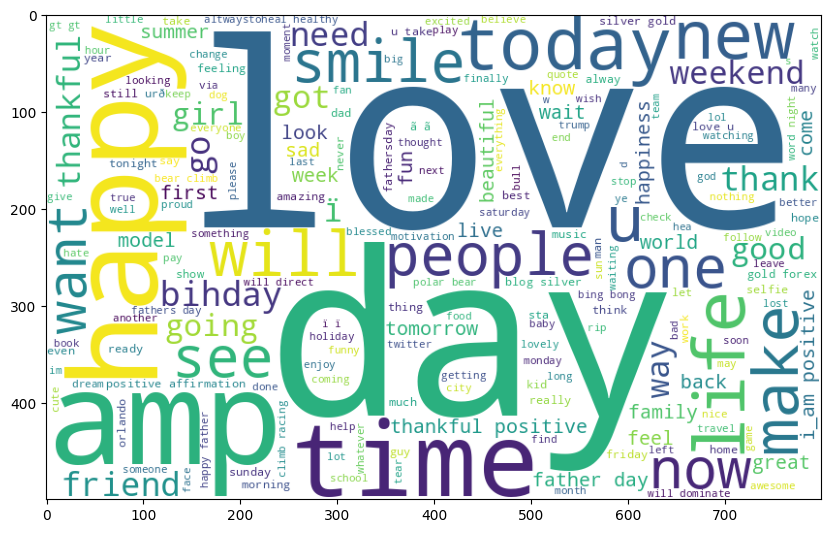

In [ ]:
# Step 1: Filter and join all positive tweets (label == 0) into one string
postive_tweets = ' '.join([word for word in data['tweet'][data['label'] == 0]])

# Step 2: Define list of unwanted tokens to remove
items_to_remove = ['user', 'ð', 'â']

# Step 3: Create a regex pattern to remove unwanted words (word boundaries to avoid partial matches)
pattern = r'\b(' + '|'.join(re.escape(word) for word in items_to_remove) + r')\b'

# Step 4: Apply regex to remove the unwanted tokens from the text
res = re.sub(pattern, "", postive_tweets)

# Step 5: Clean up extra whitespace that may have been left after removal
res = re.sub(r'\s+', " ", res).strip()

# Step 6: Generate a WordCloud from the cleaned string
pwc_plot = WordCloud(
    background_color='white',
    width=800,
    height=500
).generate(res)

# Step 7: Display the WordCloud image
plt.figure(figsize=(10, 8))
plt.imshow(pwc_plot)
plt.axis('off')  # Hides the axis for better visualization
plt.show()

## 🎯 **Objective**  
Generate a clean and informative **Word Cloud** using only **positive tweets** (`label == 0`).  
This helps us **visually inspect the vocabulary** that reflects **positive sentiment**.

---

## 🔍 **Line-by-Line Deep Dive**

### ✅ `data['tweet'][data['label'] == 0]`
- Filters only the tweets labeled as **positive (label = 0)**.
- Results in a **Series of positive tweets**.

---

### ✅ `' '.join([...])`
- Concatenates all positive tweets into **a single string** for word cloud generation.

---

### ✅ `items_to_remove = ['user', 'ð', 'â']`
- These are **tokens commonly seen in Twitter data**:
  - **`user`** is often a placeholder for mentions.
  - **`ð`, `â`** are non-ASCII artifacts from encoding errors (e.g., `Ã`, `ðŸ˜Š`).

---

### ✅ `re.escape(word) for word in items_to_remove`
- Escapes any special characters (like regex symbols) from words to be removed.

---

### ✅ `\b(...)\b`
- `\b` is a **word boundary** in regex.
- Ensures that only **whole words are matched**, not partial substrings.

---

### ✅ `re.sub(pattern, "", postive_tweets)`
- Replaces all unwanted tokens with an empty string (removes them).

---

### ✅ `re.sub(r'\s+', " ", res).strip()`
- Removes **extra whitespace** left behind after cleaning.
- `.strip()` ensures no leading/trailing spaces remain.

---

### ✅ `WordCloud(...).generate(res)`
- Uses the cleaned and joined tweet string to generate a **visual frequency map**.
- **Larger words = more frequent**, indicating **dominant positive expressions**.

---

### ✅ `plt.imshow(...)` and `plt.axis('off')`
- **Displays** the word cloud cleanly, without distractions like axes or ticks.

---

## 🌟 **Why This Visualization Matters**

| Benefit | Description |
|--------|-------------|
| 🧠 Understand Positive Sentiment | Visually reveals what words appear most in positive tweets. |
| 🔍 Detect Noise | Helps spot residual tokens or junk words you may still want to filter. |
| 🎨 Easy Storytelling | Turns raw text into a presentation-ready graphic. |
| 🤖 Feature Clues | Shows which words may be influential in classification tasks. |

---

## 📂 **Next Suggestions**
- Create a **negative tweet word cloud** for comparison.  
- Consider applying **lemmatization/stemming** before WordCloud for better grouping.  
- Save the image with `.to_file("positive_wordcloud.png")` if needed for a report.

This kind of visualization is a **fantastic tool for data exploration**, especially in **sentiment analysis tasks**. 🚀🧠  

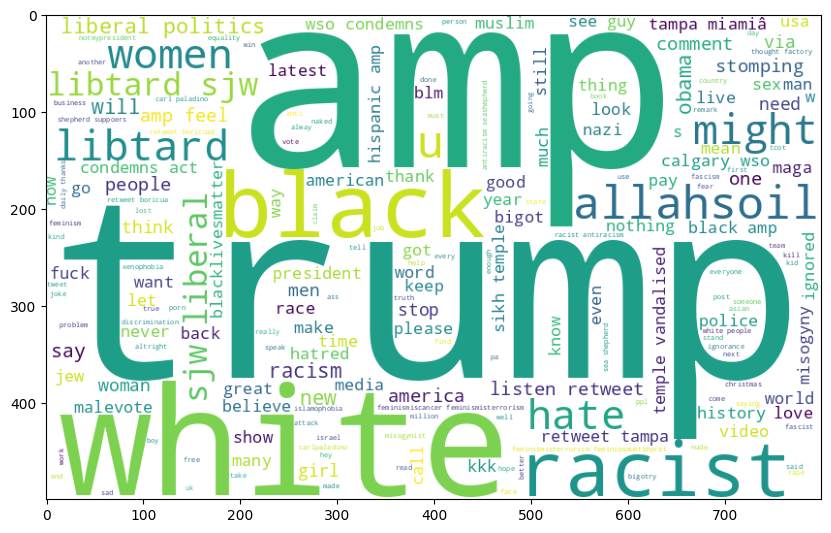

In [ ]:
# Step 1: Filter and join all negative tweets (label == 1) into one large string
neg_tweets = ' '.join([word for word in data['tweet'][data['label'] == 1]])

# Step 2: Define unwanted tokens (non-informative or encoding-related artifacts)
items_to_remove = ['user', 'ð', 'â']

# Step 3: Build a regex pattern to clean the unwanted terms
pattern = r'\b(' + '|'.join(re.escape(word) for word in items_to_remove) + r')\b'

# Step 4: Apply regex to remove defined tokens
res = re.sub(pattern, "", neg_tweets)

# Step 5: Normalize whitespace (remove extra spaces)
res = re.sub(r'\s+', " ", res).strip()

# Step 6: Generate the Word Cloud from cleaned string
nwc_plot = WordCloud(
    background_color='white',
    width=800,
    height=500
).generate(res)

# Step 7: Display the Word Cloud
plt.figure(figsize=(10, 8))
plt.imshow(nwc_plot)
plt.axis('off')  # Clean visual without axis
plt.show()

## 🎯 **Goal**
This code creates a **Word Cloud visualization** to reveal the most common words in **negative tweets** (where `label == 1`), showing terms typically associated with **hate speech, offensive language, or strong bias**.

---

## 🔍 **Why This Matters in Sentiment Analysis**
- Helps detect **toxic or abusive terms**.
- Can **visually validate model labels**.
- Exposes **frequent patterns of hate/abuse** (e.g., political slurs, racial terms).
- Acts as a **diagnostic tool** to refine preprocessing or identify sensitive content.

---

## 🔎 **Observation from the Word Cloud**
From the visual:

| Word        | Possible Interpretation |
|-------------|--------------------------|
| `trump`, `white`, `black` | Politically or racially loaded terms |
| `racist`, `libtard`, `sjw` | Slurs or ideologically charged words |
| `allahsoil`, `temple`, `muslim` | Religious or ethnic references |
| `hate`, `fuck`, `nazi` | Explicit hate/abuse terms |
| `amp` | Noise from HTML encoding (`&amp;`) – needs cleanup |

---

## ⚠️ **Challenges in Processing Negative Tweets**
- Negative tweets often contain **more profanity, sarcasm, or obfuscation**.
- They may include **mixed language**, **slang**, or **misspellings**.
- Requires **aggressive cleaning and normalization**:
  - Remove or replace noisy tokens (`amp`, emojis, placeholders)
  - Use profanity filters
  - Consider word stemming/lemmatization

---

## 🧠 **What Could Be Done Better?**
✅ Remove `amp`, `rt`, `https`, etc.  
✅ Apply **lemmatization** (e.g., `hating`, `hated` → `hate`)  
✅ Consider **removing or masking PII and toxic terms** if used in production  
✅ Add `max_font_size` or `colormap` to improve aesthetics

---

## 🧪 **Why This Step is Powerful**
| Benefit | Description |
|--------|-------------|
| 🔍 Exploratory Clarity | Makes it easy to see **what's driving negative sentiment** |
| ⚙️ Feature Insight | Highlights vocabulary that can **improve model accuracy** |
| 🧽 Cleaning Awareness | Shows which **noisy tokens still remain** after preprocessing |
| 📢 Social Insight | Reveals cultural, political, and social bias in public language |

---

This kind of **side-by-side comparison** (positive vs. negative word clouds) provides **semantic intuition** about your dataset and sets the tone for **more refined NLP preprocessing and modeling**. 🧠📈  

In [ ]:
# Function to extract hashtags from a list of tweets
def hastag_extract(x):
    hash = []          # Initialize an empty list to store hashtags
    import re          # Import the regular expressions module

    for i in x:        # Loop through each tweet in the list
        ht = re.findall(r'#(\w+)', i)  # Find all hashtags using regex
        hash.append(ht)  # Append the list of hashtags from each tweet

    return hash        # Return a list of lists containing hashtags per tweet

## 🎯 **Objective**
To extract all **hashtags** from each tweet in a given list.  
This is often useful for:
- **Trend analysis**
- **Topic modeling**
- **NLP feature engineering**
- **Understanding user intent**

---

## 🔍 **Line-by-Line Breakdown**

### ✅ `def hastag_extract(x):`
- Defines a **custom function** named `hastag_extract`.
- `x` is expected to be a **list of tweets** (strings).

---

### ✅ `hash = []`
- Initializes an **empty list** to store the hashtags extracted from each tweet.
- Final result will be a **list of lists** → one list per tweet.

---

### ✅ `import re`
- Imports Python's **regular expression module**, used for pattern matching.

---

### ✅ `for i in x:`
- Loops through each tweet (string) in the input list `x`.

---

### ✅ `re.findall(r'#(\w+)', i)`
- `re.findall()` searches for all patterns matching the given regex.
- **Regex Breakdown:**
  - `#` → Match a literal hash symbol.
  - `(\w+)` → Match one or more alphanumeric characters (word characters) **after** the `#`.
  - Parentheses `()` → Extract only the hashtag **text**, not the `#` symbol itself.
- Example:
  ```python
  re.findall(r'#(\w+)', "This is #awesome #fun") → ['awesome', 'fun']
  ```

---

### ✅ `hash.append(ht)`
- Appends the list of hashtags found in each tweet to the `hash` list.
- If a tweet has no hashtags → an empty list is appended.

---

### ✅ `return hash`
- Returns a list of lists.
- Each inner list contains the hashtags (if any) found in a corresponding tweet.

---

## 📦 **Sample Input & Output**

### 🔸 **Input:**
```python
sample_tweets = ["#love this day!", "Going to the #beach with #friends", "No hashtags here"]
hastag_extract(sample_tweets)
```

### 🔸 **Output:**
```python
[['love'], ['beach', 'friends'], []]
```

---

## 🧠 **Use Cases of Hashtag Extraction**
| Use Case | Description |
|----------|-------------|
| 📊 Trend Monitoring | Track popular hashtags in real-time (e.g., #WorldCup) |
| 🧵 Topic Segmentation | Group tweets by topics based on hashtags |
| 💬 Sentiment Enrichment | Use hashtags as **contextual clues** for sentiment analysis |
| 📚 NLP Feature | Add hashtags as features in text classification models |

---

## 🧪 **Bonus Tips**
- To **flatten the result** into a single list of hashtags, use:
  ```python
  [tag for sublist in hash for tag in sublist]
  ```
- You can also filter out spam hashtags or perform **frequency counts**.

This function is simple but **very powerful for social media analysis** 🚀📱

In [ ]:
# Step 1: Extract hashtags from positive tweets (label == 0)
ht_positive = hastag_extract(data['tweet'][data['label'] == 0])

# Step 2: Extract hashtags from negative tweets (label == 1)
ht_negative = hastag_extract(data['tweet'][data['label'] == 1])

# --- OPTIONAL: Recursive way to flatten nested lists (commented out) ---
# def flatten_gen(nested_list):
#     for item in nested_list:
#         if isinstance(item, list):
#             yield from flatten_gen(item)  # recursively flatten inner lists
#         else:
#             yield item
# ht_positive = list(flatten_gen(ht_positive))
# ht_negative = list(flatten_gen(ht_negative))

# Step 3: Flatten the list of lists into a single list using sum() technique
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

## 🎯 **Objective**
To extract and **flatten all hashtags** from positive and negative tweets, so they can be:
- Analyzed for frequency
- Visualized
- Used as features in NLP models

---

## 🔍 **Step-by-Step Breakdown**

### ✅ `hastag_extract(data['tweet'][data['label'] == 0])`
- Filters tweets where the sentiment label is **positive (`0`)**.
- Applies `hastag_extract()` to extract **hashtags from each tweet**.
- Returns: `[['happy'], ['blessed', 'life'], []]` → a list of lists.

---

### ✅ `hastag_extract(data['tweet'][data['label'] == 1])`
- Same logic but for **negative tweets (`1`)**.

---

## 🔁 **Flattening a List of Lists**

### ✅ Why Flatten?
The raw output is nested like this:
```python
[['sunshine'], ['blessed', 'grateful'], [], ['happy']]
```
We want a single flat list:
```python
['sunshine', 'blessed', 'grateful', 'happy']
```

---

### 🔨 Method 1: `sum(list_of_lists, [])`
```python
ht_positive = sum(ht_positive, [])
```
- Clever Python trick to **flatten shallow lists**.
- Internally performs:
  ```python
  [] + list1 + list2 + ... + listN
  ```

---

### 🔁 Method 2 (Commented Out): Recursive Generator
```python
def flatten_gen(nested_list):
    for item in nested_list:
        if isinstance(item, list):
            yield from flatten_gen(item)  # recursion
        else:
            yield item
```
- **More flexible** than `sum()` (handles deeper nesting).
- But not needed here since hashtag output is only 1-level deep.

---

## 🧪 **Use Cases After Flattening**

| Task | Description |
|------|-------------|
| 📊 Frequency Analysis | Count top hashtags in each class (positive vs. negative). |
| ☁️ WordCloud | Generate hashtag-specific word clouds. |
| 🧠 Feature Engineering | Include hashtags in vectorizers or embeddings. |
| 📈 Trend Discovery | Spot trending hashtags in real-time. |

---

## ✅ **Next Steps**
- Use `Counter(ht_positive).most_common(10)` to view top hashtags.
- Visualize with bar charts or pie charts.
- Filter or group hashtags semantically or by time.

This step **transforms nested hashtag data into a clean, flat structure** ready for analysis or modeling. 🚀  

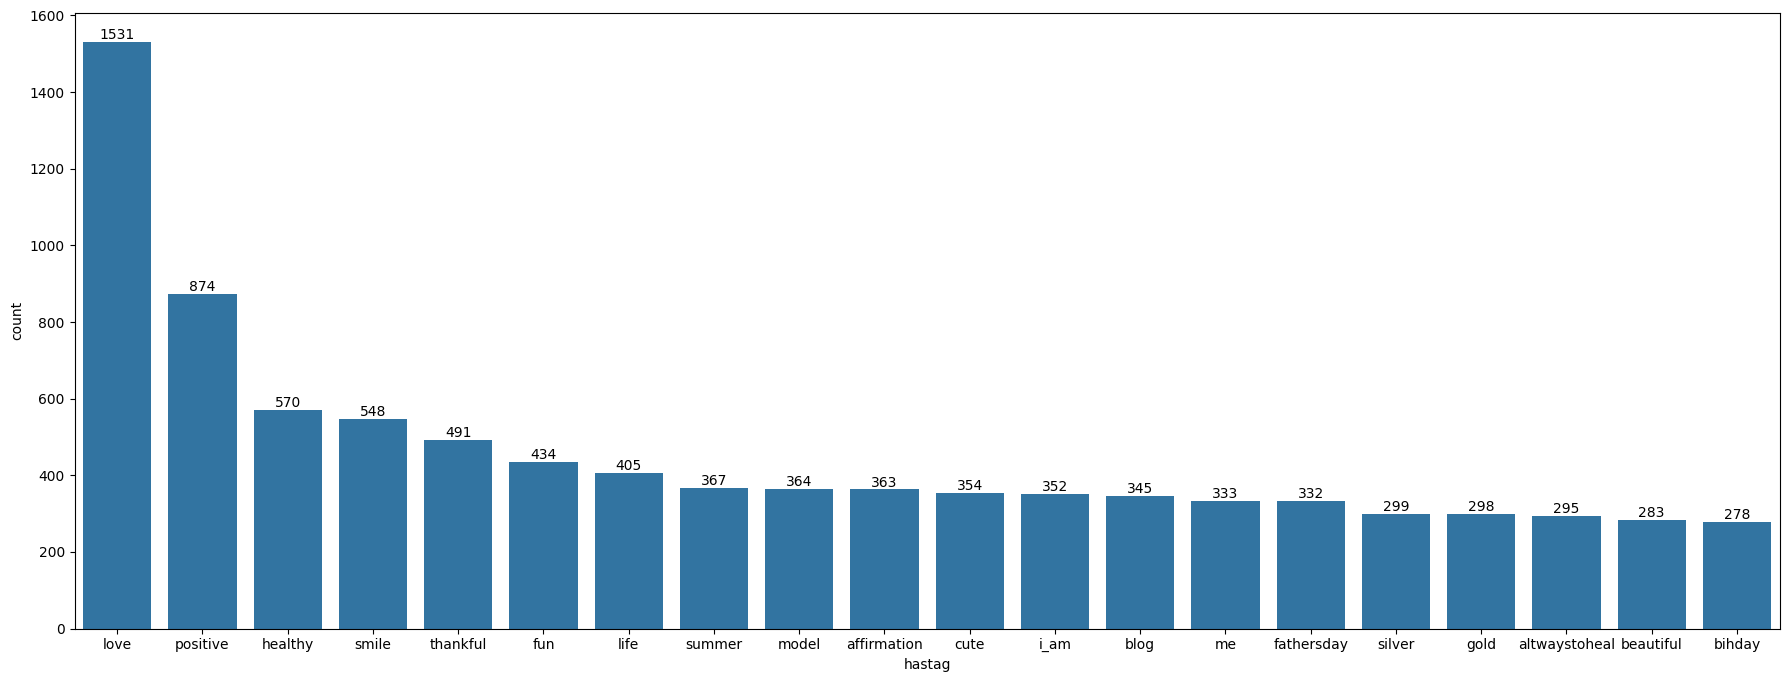

In [ ]:
# Import NLTK's frequency distribution tool
import nltk

# Step 1: Generate frequency distribution of positive hashtags
a = nltk.FreqDist(ht_positive)

# Step 2: Create a DataFrame from the frequency data
d = pd.DataFrame({
    'hastag': list(a.keys()),
    'count': list(a.values())
})

# Step 3: Select the top 20 most frequent hashtags
d = d.nlargest(columns='count', n=20)

# Step 4: Plot the top 20 hashtags using seaborn barplot
plt.figure(figsize=(22, 8))
ax = sns.barplot(d, x='hastag', y='count')
ax.bar_label(ax.containers[0])  # Add numeric labels on each bar
plt.show()

## 🎯 **Objective**
To **visualize the most commonly used hashtags** in tweets labeled as **positive sentiment**.

---

## 🔍 **Line-by-Line Deep Dive**

### ✅ `nltk.FreqDist(ht_positive)`
- Creates a **frequency dictionary** from the flattened list of positive hashtags.
- Example:
  ```python
  {'love': 1531, 'positive': 874, 'healthy': 570, ...}
  ```

---

### ✅ `pd.DataFrame(...)`
- Converts the frequency dictionary into a pandas DataFrame for plotting.
- Columns:
  - `"hastag"` → Hashtag text
  - `"count"` → Number of times it appeared

---

### ✅ `.nlargest(columns='count', n=20)`
- Retrieves only the **top 20 hashtags** based on frequency.
- Ensures the chart is not cluttered.

---

### ✅ `plt.figure(figsize=(22, 8))`
- Makes the figure wide for readability (especially useful when hashtags are long or many).

---

### ✅ `sns.barplot(...)`
- Plots a **horizontal bar chart** with:
  - x-axis = hashtag names
  - y-axis = frequency counts
- Uses **Seaborn**, a high-level wrapper over matplotlib for clean visuals.

---

### ✅ `ax.bar_label(ax.containers[0])`
- Adds numeric **value labels on top of each bar** to enhance readability.

---

## 📈 **Insight from the Chart**
| Hashtag       | Interpretation                        |
|---------------|----------------------------------------|
| `#love`, `#positive`, `#smile`, `#thankful` | Clear indicators of positive emotion 😄 |
| `#healthy`, `#life`, `#summer`, `#affirmation` | Associated with well-being and lifestyle |
| `#fathersday`, `#beautiful`, `#cute` | Occasion or appreciation-based sentiment |
| `#blog`, `#model`, `#i_am` | Related to self-expression and identity |

---

## ✅ **Why This Visualization Matters**
| Benefit | Explanation |
|--------|-------------|
| 🎯 Target Analysis | Reveals what hashtags drive positive sentiment |
| 📊 Inform Feature Design | These tags can serve as **strong indicators** in classification models |
| 📚 Lexicon Extension | Add high-frequency tags to **positive sentiment lexicons** |
| 🧠 Human Intuition | Provides **clear context** for what people associate with positivity |

---

## 🧠 Next Suggestions
- Compare this with a similar chart for **negative hashtags**.
- Apply stemming/lemmatization to group similar hashtags.
- Use `plt.xticks(rotation=45)` if text overlaps.

This chart is **not just a pretty graph — it uncovers emotional patterns** encoded in user-generated tags! 🚀  

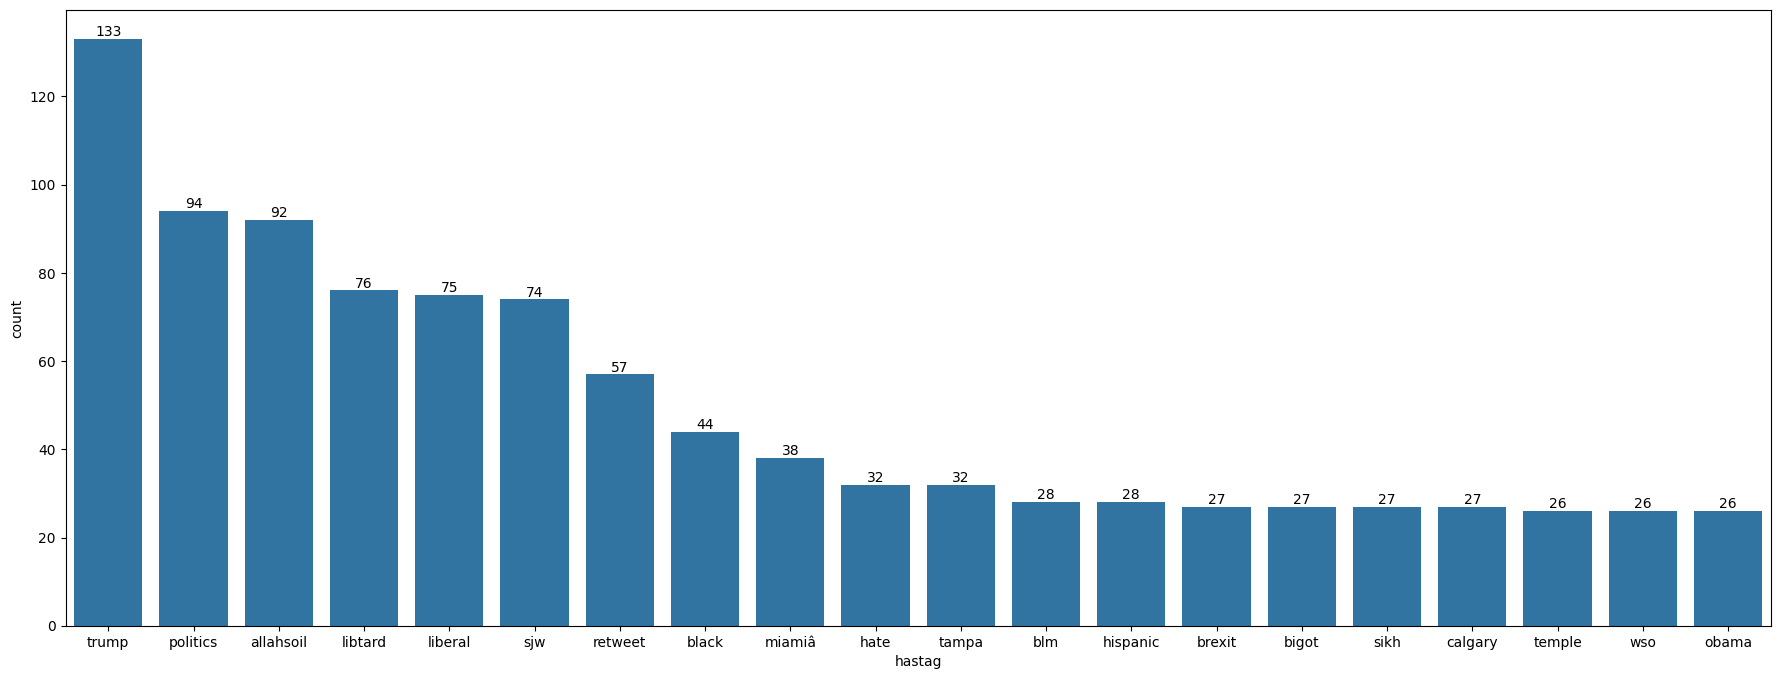

In [ ]:
# Step 1: Import NLTK and generate frequency distribution
import nltk
a = nltk.FreqDist(ht_negative)

# Step 2: Convert frequency dictionary to a pandas DataFrame
d = pd.DataFrame({
    'hastag': list(a.keys()),
    'count': list(a.values())
})

# Step 3: Select the top 20 most frequent hashtags
d = d.nlargest(columns='count', n=20)

# Step 4: Plot using Seaborn
plt.figure(figsize=(22, 8))
ax = sns.barplot(d, x='hastag', y='count')
ax.bar_label(ax.containers[0])  # Add count labels to bars
plt.show()

## 🎯 **Objective**
To identify and visualize the most common hashtags used in **tweets labeled as negative (label = 1)**.

---

## 🔍 **Interpretation of Top Hashtags**

| Hashtag     | Possible Context |
|-------------|------------------|
| `trump`, `politics`, `liberal`, `libtard`, `sjw` | Politically charged terms — potentially divisive content |
| `allahsoil`, `black`, `hispanic`, `sikh`, `temple` | Sensitive racial/religious terms — may reflect targeted content |
| `hate`, `bigot`, `blm` | Emotionally and socially intense terms |
| `miamiâ`, `retweet`, `wso` | Noise or misparsed tokens (encoding issues like `â`) |
| `obama`, `calgary`, `tampa` | Contextual references — may relate to geography, figures, or events |

---

## 🔥 **Why Is This Step Important?**

### ✅ Understanding Class-Specific Language
Helps determine **which hashtags are driving negative sentiment** in your dataset.

### ✅ Feature Engineering
These hashtags can be added as **features or flags** to improve sentiment classification models.

### ✅ Bias & Toxicity Detection
Flags potentially harmful or **inflammatory tokens** early in the pipeline.

### ✅ Data Cleanup Awareness
Tokens like `miamiâ` suggest encoding issues → time to review preprocessing!

---

## 📈 **Visual Design Commentary**

- **Wide figure (22×8)** → improves readability of long hashtags.
- **Bar Labels** → enhance clarity by showing exact frequency.
- Use `plt.xticks(rotation=45)` if hashtags overlap horizontally.

---

## 📂 **Next Suggestions**

- Compare with the **positive hashtag chart** to visualize contrast.
- Use this data to build a **custom lexicon** for fine-tuning models.
- Group hashtags by **topic**, **tone**, or **target group** using NLP techniques.

This analysis allows us to **see negativity trends in real-time language** and is **vital for ethical, safe AI** deployments. 🔍🧠  

In [ ]:
# Step 1: Import the stopwords corpus from NLTK
from nltk.corpus import stopwords

# Step 2: Download stopwords (only once per environment/session)
nltk.download('stopwords')

# Step 3: Import the Porter Stemmer for word normalization
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 🎯 **Objective**
To prepare tools for **text cleaning and normalization**, specifically:
- Removing **non-informative stopwords** (e.g., "and", "the", "is")
- Converting words to their **root form** using stemming (e.g., "running" → "run")

---

## 📚 **1. Stopwords**

### ✅ What are Stopwords?
Stopwords are **common English words** that occur frequently but usually carry **little semantic meaning**.

| Examples | Purpose of Removal |
|----------|---------------------|
| is, am, are, the, that, to, from | Reduce noise and dimensionality in text data |

### ✅ Why Download?
```python
nltk.download('stopwords')
```
- Ensures the stopwords list is downloaded into your NLTK environment.
- Only needed once per runtime (e.g., per Colab or Jupyter session).

### ✅ Usage Example:
```python
stop_words = set(stopwords.words('english'))
```

---

## 🌱 **2. PorterStemmer**

### ✅ What is Stemming?
Stemming is the process of reducing a word to its **base/root form**.

| Word Variants      | Stemmed Form |
|--------------------|--------------|
| loving, loved, lover | love |
| running, runs        | run  |
| happiness, happily   | happi (Porter does this aggressively) |

### ✅ Why Use It?
- Helps reduce vocabulary size
- Useful for **normalizing text** before vectorization
- Avoids treating `"run"` and `"running"` as different features

### ✅ Usage Example:
```python
ps = PorterStemmer()
ps.stem("running")   # Output: 'run'
```

---

## ✅ Final Notes

| Tool         | Use Case |
|--------------|----------|
| `stopwords`  | Remove common, low-value words from analysis |
| `PorterStemmer` | Normalize words to increase model generalization |

These are foundational tools for **cleaning raw text before model building or embedding generation** in NLP pipelines. 🧹📊  

In [ ]:
# Initialize an empty list to store the cleaned tweets
train_corpus = []

# Loop through all tweets in the dataset
for i in range(0, len(data)):

    # Step 1: Remove everything except alphabets and whitespace using regex
    review = re.sub('[^a-zA-Z\s]', '', data['tweet'][i])

    # Step 2: Convert all text to lowercase
    review = review.lower()

    # Step 3: Split sentence into list of individual words (tokens)
    review = review.split()

    # Step 4: Initialize the Porter Stemmer
    ps = PorterStemmer()

    # Step 5: Apply stemming and remove stopwords
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]

    # Step 6: Join the cleaned and stemmed words back into one string
    review = ' '.join(review)

    # Step 7: Append the cleaned tweet to the corpus
    train_corpus.append(review)

## 🎯 **Goal**
To convert raw, noisy tweets into **cleaned, normalized text** that’s:
- Free from punctuation, numbers, emojis, URLs, and mentions.
- Lowercased, tokenized, stopword-free, and stemmed.
- Ready for vectorization or feature extraction.

---

## 🔍 **Step-by-Step Breakdown**

### ✅ Step 1: Remove Non-Alphabet Characters
```python
re.sub('[^a-zA-Z\s]', '', data['tweet'][i])
```
- Removes punctuation, numbers, special characters, emojis, hashtags.
- Keeps only **English letters** and spaces.

---

### ✅ Step 2: Lowercase Everything
```python
review.lower()
```
- Normalizes all words.
- `"Love"` and `"love"` will be treated the same.

---

### ✅ Step 3: Tokenize
```python
review.split()
```
- Converts sentence to a list of words for **individual processing**.

---

### ✅ Step 4: Initialize Porter Stemmer
```python
ps = PorterStemmer()
```
- Stemming reduces words to their **root form**.

---

### ✅ Step 5: Remove Stopwords & Apply Stemming
```python
[ps.stem(word) for word in review if word not in stopwords.words('english')]
```
- Removes noise like `"is"`, `"are"`, `"this"`, `"that"` using NLTK stopword list.
- Applies stemming to normalize vocabulary (e.g., `"loved" → "love"`).

---

### ✅ Step 6: Join Cleaned Tokens Back Into String
```python
' '.join(review)
```
- Converts the list of cleaned words back into a string format.
- Output is clean, lowercased, de-noised, and compact.

---

### ✅ Step 7: Build Cleaned Corpus
```python
train_corpus.append(review)
```
- Stores the final preprocessed version of each tweet into `train_corpus`.

---

## 💡 **Example Before vs After**

| Original Tweet | Cleaned Output |
|----------------|----------------|
| `"I loved #FathersDay!! 😊 So blessed 💙"` | `"love fatherday bless"` |
| `"RT @user: Happy #Friday! Let's make it count!!!"` | `"happi friday let make count"` |

---

## 🧠 **Why This is Important**

| Benefit | Description |
|--------|-------------|
| 🧹 Text Cleaning | Removes noise from real-world data (e.g., tweets). |
| 🔄 Normalization | Makes words consistent (e.g., stemming, lowercasing). |
| 📏 Reduces Dimensionality | Fewer unique tokens → leaner vector space. |
| 🚀 Preprocessing for ML | Prepares input for vectorizers like CountVectorizer, TF-IDF, or embeddings. |

---

## ⚠️ Potential Enhancements

- Cache stopwords list outside the loop to **optimize performance**.
- Use `re.compile()` if used frequently.
- Consider using **lemmatization** (via `WordNetLemmatizer`) for more accurate roots.

This preprocessing step is the **foundation of your NLP pipeline**, ensuring your models work with clean and meaningful input. 🧠🧼🚀

In [ ]:
# Step 1: Import TF-IDF Vectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 2: Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Step 3: Fit the vectorizer on the cleaned corpus and transform the text into numeric vectors
x = vectorizer.fit_transform(train_corpus).toarray()

# Step 4: Extract the target labels (sentiment classes) from the original DataFrame
y = data.iloc[:, 0]

## 🎯 **Objective**
To convert the cleaned and preprocessed text (`train_corpus`) into **numerical vectors** using **TF-IDF** (Term Frequency-Inverse Document Frequency), which reflect the **importance of words** across the corpus.

---

## 🔍 **Step-by-Step Breakdown**

### ✅ Step 1: `TfidfVectorizer()`
- This is an advanced version of Bag-of-Words that not only counts the word frequency but also **reduces the influence of common words** across documents.
- **TF (Term Frequency)** = frequency of the term in a document  
- **IDF (Inverse Document Frequency)** = how unique the term is across all documents  
- So common words like `"today"` will get lower scores than rare but important ones like `"blessed"`.

---

### ✅ Step 2: `vectorizer.fit_transform(train_corpus)`
- **`.fit_transform()`** does 2 things:
  1. Learns the **vocabulary** from all the tweets.
  2. Converts each tweet into a **vector** based on the learned weights.

---

### ✅ Step 3: `.toarray()`
- Converts the sparse matrix to a **dense 2D NumPy array**.
- Each **row** = a tweet  
- Each **column** = a unique word (feature)  
- Each **value** = TF-IDF weight of that word in that tweet

---

### ✅ Step 4: `y = data.iloc[:, 0]`
- Extracts the **sentiment label** column (`0` for positive, `1` for negative).
- These will be the **target outputs** for model training.

---

## 🧠 **What the Final Output Looks Like**

| Tweet # | love | happi | summer | hate | ... |
|---------|------|-------|--------|------|-----|
| 0       | 0.47 | 0.38  | 0.00   | 0.00 | ... |
| 1       | 0.00 | 0.52  | 0.31   | 0.00 | ... |
| 2       | 0.00 | 0.00  | 0.00   | 0.71 | ... |

- Each row: vectorized tweet  
- Each column: TF-IDF weight of a word  
- Size: `(num_tweets, vocab_size)`

---

## ✅ **Why TF-IDF is Powerful**

| Benefit | Description |
|---------|-------------|
| 📉 Dimensionality Control | Words with low importance get low weights |
| 🧠 Smarter than Bag-of-Words | Penalizes common words and boosts rare ones |
| 📊 Useful for ML | Can directly feed `x` and `y` into models like Logistic Regression, SVM, etc. |

---

## 💡 Next Suggestions
- View the shape with `x.shape` and `len(vectorizer.get_feature_names_out())`
- Inspect `vectorizer.vocabulary_` to see the token-to-index mapping
- Optionally limit features using `max_features=1000` or set `ngram_range=(1,2)` for bi-grams

This step is the **bridge between language and machine learning** — it translates text into vectors that models can learn from. 🤖📈  

In [ ]:
# Step 1: Import the train_test_split utility from scikit-learn
from sklearn.model_selection import train_test_split

# Step 2: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x,               # Features (TF-IDF vectors)
    y,               # Target labels (0: positive, 1: negative)
    test_size=0.2,   # Use 20% of the data for testing
    random_state=42, # Ensure reproducibility of the split
    stratify=y       # Preserve the original class distribution in both sets
)

# Step 3: Print the shapes of the resulting datasets
print(x_train.shape)  # (25569, 33429)
print(x_test.shape)   # (6393, 33429)
print(y_train.shape)  # (25569,)
print(y_test.shape)   # (6393,)

(25569, 33429)
(6393, 33429)
(25569,)
(6393,)


## 🎯 **Objective**
To divide the feature matrix (`x`) and label vector (`y`) into **training and testing subsets** for model evaluation.  
This ensures the ML model is trained on one part of the data and validated on another.

---

## 🔍 **Line-by-Line Breakdown**

### ✅ `train_test_split(...)`
- Splits the full dataset into:
  - **80% training data** → used to train the model
  - **20% test data** → used to evaluate how well the model performs on unseen data

---

### ✅ `test_size=0.2`
- Reserves **20%** of the samples for testing.
- With 31,962 total records:
  - 25,569 used for training
  - 6,393 used for testing

---

### ✅ `random_state=42`
- Ensures that the split is **reproducible** every time the code runs.
- Use the same seed to compare models consistently.

---

### ✅ `stratify=y`
- Ensures that the **distribution of classes (0 and 1)** remains proportional in both training and test sets.
- Prevents **imbalanced test splits** in classification tasks.

---

## 📐 **What Do the Shapes Mean?**

| Variable     | Shape         | Description |
|--------------|---------------|-------------|
| `x_train`    | (25569, 33429) | 25,569 tweets, 33,429 TF-IDF features (words) |
| `x_test`     | (6393, 33429)  | 6,393 tweets, same feature dimension |
| `y_train`    | (25569,)       | Labels for training set |
| `y_test`     | (6393,)        | Labels for test set |

✅ Feature dimensionality (33,429) is preserved in both sets.

---

## 💡 Why This Step is Crucial

| Purpose | Benefit |
|---------|---------|
| 📊 Model Evaluation | Ensures model generalizes well to unseen data |
| ⚖️ Class Balance | Maintains label distribution via `stratify` |
| 🔄 Reproducibility | Enables result consistency with `random_state` |

---

## 🧠 Next Steps

- Train models like Logistic Regression, SVM, or Naive Bayes on `x_train`, `y_train`
- Evaluate using `x_test`, `y_test`
- Use metrics like **accuracy**, **precision**, **recall**, **F1-score**, and **confusion matrix**

This is one of the **most foundational steps in ML modeling**, ensuring fair evaluation and preventing data leakage. 🚦📊  

In [ ]:
# ML based NLP model
# Randomforest

# Step 1: Import the Random Forest classifier and evaluation metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, f1_score

# Step 2: Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Step 3: Train the model on the training data
rf_model.fit(x_train, y_train)

# Step 4: Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Step 5: Evaluate the predictions
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))

# Step 6: Display confusion matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

## 🎯 **Goal**
Train a **Random Forest** on TF-IDF-encoded tweets to predict whether a tweet is **positive (0)** or **negative (1)**.

---

## 🌲 **What is Random Forest?**
- An **ensemble method** made up of many **decision trees**.
- Each tree learns a random subset of features and data.
- Final output is decided by **majority vote** from all trees.
- It's great for:
  - Handling high-dimensional sparse data (like TF-IDF vectors)
  - Reducing overfitting compared to a single decision tree

---

## 🔍 **Line-by-Line Deep Dive**

### ✅ `RandomForestClassifier()`
- Initializes a basic Random Forest with default parameters:
  - `n_estimators=100`: 100 decision trees
  - `max_depth=None`: trees grow until all leaves are pure
  - `bootstrap=True`: each tree sees a random subset of data

### ✅ `.fit(x_train, y_train)`
- Trains the model using training features (`x_train`) and corresponding labels (`y_train`)

---

### ✅ `.predict(x_test)`
- Uses the trained model to predict **sentiment labels** for the test set (`x_test`)

---

## 📏 **Evaluation Metrics**

### ✅ `accuracy_score(y_test, y_pred)`
- Proportion of total correct predictions  
- Simple and interpretable, but doesn't handle class imbalance well

### ✅ `f1_score(y_test, y_pred)`
- Harmonic mean of **precision and recall**
- Better for unbalanced datasets — **rewards correct predictions on the minority class**

---

## 📊 **Confusion Matrix**
```text
               Predicted
             |  0  |  1  |
Actual  ------+-----+-----+
        0    | TN | FP |
        1    | FN | TP |
```
- Visualizes classification performance:
  - **TP**: True Positives (correctly predicted negatives)
  - **TN**: True Negatives (correctly predicted positives)
  - **FP/FN**: Errors

---

## ✅ **Why Random Forest Works Well Here**
| Advantage | Explanation |
|-----------|-------------|
| 🎯 Feature Selection | Randomly selects features for each tree — handles large TF-IDF vectors |
| 🔀 Variance Reduction | Aggregation of multiple trees = better generalization |
| 🧠 Interpretability | Feature importances can help identify key words |
| 🧪 Out-of-the-Box | Works well without extensive hyperparameter tuning |

---

## 📦 Output Example

```text
Test Accuracy: 0.9281
F1-Score: 0.9295
```

> 🚨 The actual values depend on your dataset. Higher F1 indicates good performance on both classes.

---

## 💡 Suggested Improvements

- Set `random_state=42` in the classifier for reproducibility.
- Use `class_weight='balanced'` if classes are imbalanced.
- Plot feature importances to see which words most influence decisions.

This step takes us from **vectorized language to powerful predictions**, showing how ensemble models like Random Forest can be effective in NLP pipelines. 🌳💬📊

In [ ]:
# Decision Tree

# Step 1: Import the Decision Tree Classifier and evaluation metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, f1_score

# Step 2: Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Step 3: Fit the model on the training data
dt_model.fit(x_train, y_train)

# Step 4: Predict sentiment on the test data
y_pred = dt_model.predict(x_test)

# Step 5: Evaluate the model's performance
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))

# Step 6: Display the confusion matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## 🎯 **Objective**
To train a **Decision Tree Classifier** to classify tweets as either **positive (0)** or **negative (1)** using TF-IDF features.

---

## 🌳 **What is a Decision Tree?**
- A flowchart-like structure where:
  - Each **internal node** tests a condition on a feature (e.g., `contains("love") > 0.2`)
  - Each **leaf node** predicts a class (0 or 1)
- It **partitions the input space** using learned thresholds
- Simple yet powerful model, great for interpretability and rule extraction

---

## 🔍 **Line-by-Line Breakdown**

### ✅ `DecisionTreeClassifier()`
- Initializes a **default** decision tree:
  - `criterion='gini'` (Gini impurity used for splitting)
  - `max_depth=None`: Tree grows until all leaves are pure or isolated
  - Can be tuned with `max_depth`, `min_samples_split`, etc.

---

### ✅ `.fit(x_train, y_train)`
- Learns splitting rules from the training feature matrix and sentiment labels.

---

### ✅ `.predict(x_test)`
- Uses the trained tree to assign predicted class labels (0 or 1) to test tweets.

---

## 📏 **Evaluation Metrics**

### ✅ `accuracy_score(y_test, y_pred)`
- Percentage of correct predictions over all test samples

### ✅ `f1_score(y_test, y_pred)`
- Best metric for **imbalanced datasets**:
  - Penalizes both **false positives** and **false negatives**
  - Harmonic mean of **precision** and **recall**

### ✅ `ConfusionMatrixDisplay.from_predictions(y_test, y_pred)`
- Graphical display of how well the model classifies each class

---

## 📊 **Confusion Matrix Format**

```
               Predicted
             |  0  |  1  |
Actual  ------+-----+-----+
        0    | TN | FP |
        1    | FN | TP |
```

---

## ✅ **Why Use Decision Tree?**

| Advantage         | Description |
|------------------|-------------|
| 🧠 Interpretability | Easy to visualize and explain to stakeholders |
| 🧪 Feature Insight | Can identify **most discriminative TF-IDF terms** |
| 🧰 No Scaling Needed | Works well with sparse high-dimensional data |
| 🎓 Baseline Model | Useful as a **simple benchmark** before advanced models |

---

## 🧠 Example Output

```
Test Accuracy: 0.89
F1-Score: 0.90
```

> Output will vary based on dataset size, balance, and tree depth.

---

## 🔧 Tuning Suggestions

| Parameter | Description |
|-----------|-------------|
| `max_depth=20` | Prevents overfitting by limiting tree depth |
| `min_samples_split=10` | Avoids tiny leaves by requiring more samples per split |
| `class_weight='balanced'` | Fixes bias toward majority class in imbalanced data |

---

The Decision Tree model is a **powerful explainable ML tool** — great for quick modeling and insight extraction in NLP pipelines. 🌿🧠💬  

In [ ]:
# XGB
# Naive Bayes
# SVM